In [1]:
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
from rasterio.plot import show
from scgan.cgan.discriminative_network import DiscriminativeNetwork
from scgan.cgan.generative_network import GenerativeNetwork
from scgan.generator import SentinelDataGenerator, Purpose

generator = SentinelDataGenerator('sample')

Using TensorFlow backend.


In [2]:
generator.images_df(Purpose.TRAIN)

,id
0,56
1,57
2,58
3,59
4,60
...,...
85,941
86,942
87,943
88,944


In [3]:
l, r = generator.load(1)
pd.DataFrame({
    'input image': l,
    'conditioning image': r
})

,input image,conditioning image
0,"[[[1645.0, 1385.0, 1443.0, 2583.0], [1636.0, 1...","[[[6.0], [6.0], [6.0], [6.0], [6.0], [6.0], [6..."


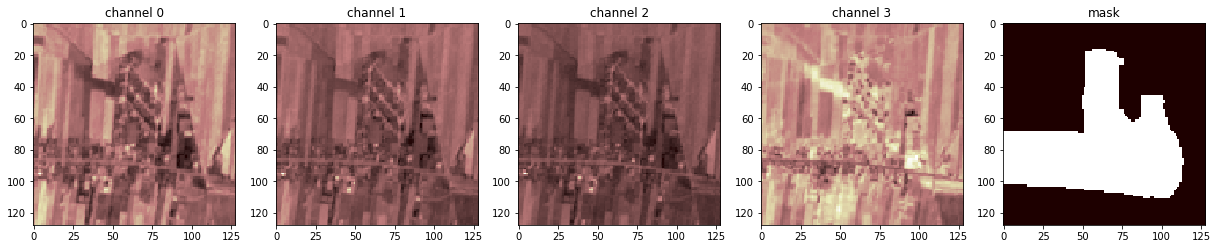

In [4]:
fig, axs = plt.subplots(1, 5, figsize=(21,7))
for index, ax in enumerate(axs):
    if index < 4:
        ax.imshow(l[0][:, :, index], cmap='pink')
        ax.set_title('channel %s' % index)
    else:
        ax.imshow(r[0][:, :, 0], cmap='pink')
        ax.set_title('mask')
        
plt.savefig('../figs/sample.png')

In [5]:
generative_network = GenerativeNetwork()
gen_model = generative_network.build(init_filters=32, input_shape=(128, 128, 4))
gen_model.summary()













__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 32)   2080        input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 64, 64, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 64)   32832       leaky_re_lu_1[0][0]              
_________________________________________________________________________________________________

In [6]:
discriminative_network = DiscriminativeNetwork()
disc_model = discriminative_network.build(init_filters=32, input_shape=(128, 128, 4), condition_shape=(128, 128, 1))
disc_model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 4)  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
concatenate_7 (Concatenate)     (None, 128, 128, 5)  0           input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 64, 64, 32)   2592        concatenate_7[0][0]              
__________